In [1]:
from matplotlib import pyplot as plt

from pyloki.config import PulsarSearchConfig
from pyloki.search import ffa_search
from pyloki.simulation.pulse import PulseSignalConfig

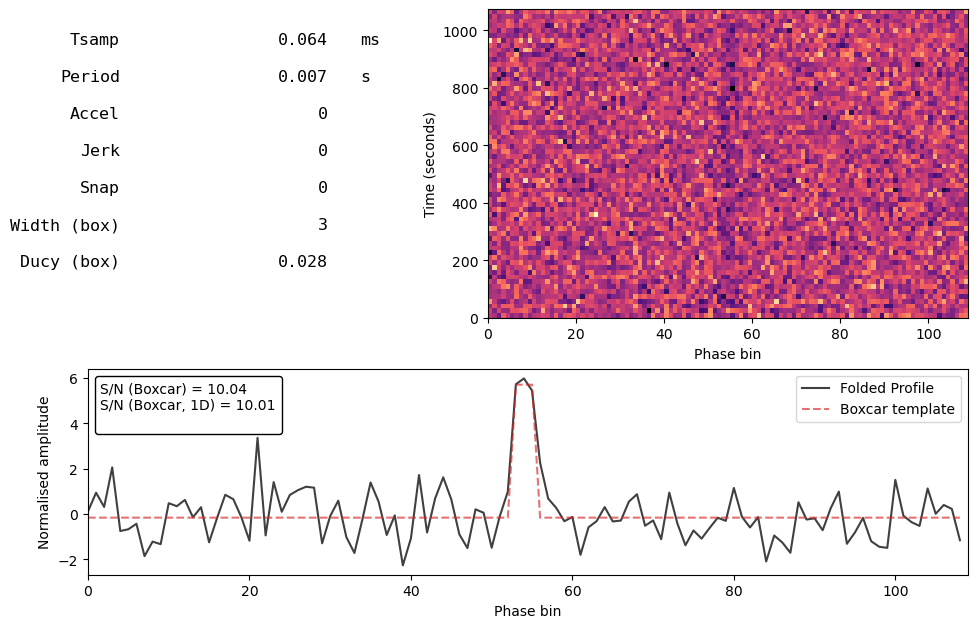

In [2]:
pulsar_period = 0.007  # (s)
dt = 64e-6
nsamps = 2**24
cfg = PulseSignalConfig(period=pulsar_period, dt=dt, snr=10, ducy=0.05, nsamps=nsamps, os=1)
tim_data = cfg.generate(shape="gaussian")
fig = tim_data.plot_fold(cfg.freq, cfg.fold_bins)
plt.show()

In [9]:
tol_bins = 1  # cfg.tol_bins
fold_bins = 64  # cfg.fold_bins
param_limits = [(1 / 0.0075, 1 / 0.0065)]
bseg_brute = cfg.nsamps // 16384
search_cfg = PulsarSearchConfig(nsamps=cfg.nsamps, tsamp=cfg.dt, nbins=fold_bins, tol_bins=tol_bins, param_limits=param_limits,
                                bseg_brute=bseg_brute, ducy_max=0.2, wtsp=1.5, use_fft_shifts=True)
dyp, pgram = ffa_search(tim_data, search_cfg)

2025-07-30 01:10:21 INFO     - pyloki.ffa - FFA initialize: Grid sizes: [0.23841858]

2025-07-30 01:10:32 INFO     - pyloki.ffa - ffa level:  0, leaves: 6.43, fold dims: (16384, 86, 2, 33)

                    INFO     - pyloki.ffa - ffa_initialize finished, Elapsed time: 11.023 seconds

Output()

2025-07-30 01:10:33 INFO     - pyloki.ffa - ffa level:  1, leaves:  7.43, fold dims: (8192, 172, 2, 33)

2025-07-30 01:10:34 INFO     - pyloki.ffa - ffa level:  2, leaves:  8.43, fold dims: (4096, 344, 2, 33)

                    INFO     - pyloki.ffa - ffa level:  3, leaves:  9.43, fold dims: (2048, 688, 2, 33)

2025-07-30 01:10:35 INFO     - pyloki.ffa - ffa level:  4, leaves: 10.43, fold dims: (1024, 1376, 2, 33)

2025-07-30 01:10:36 INFO     - pyloki.ffa - ffa level:  5, leaves: 11.43, fold dims: (512, 2753, 2, 33)

                    INFO     - pyloki.ffa - ffa level:  6, leaves: 12.43, fold dims: (256, 5506, 2, 33)

2025-07-30 01:10:37 INFO     - pyloki.ffa - ffa level:  7, leaves: 13.43, fold dims: (128, 11012, 2, 33)

2025-07-30 01:10:38 INFO     - pyloki.ffa - ffa level:  8, leaves: 14.43, fold dims: (64, 22025, 2, 33)

                    INFO     - pyloki.ffa - ffa level:  9, leaves: 15.43, fold dims: (32, 44050, 2, 33)

2025-07-30 01:10:39 INFO     - pyloki.ffa - ffa level: 10, leaves: 16.43, fold dims: (16, 88101, 2, 33)

                    INFO     - pyloki.ffa - ffa level: 11, leaves: 17.43, fold dims: (8, 176203, 2, 33)

2025-07-30 01:10:40 INFO     - pyloki.ffa - ffa level: 12, leaves: 18.43, fold dims: (4, 352407, 2, 33)

2025-07-30 01:10:41 INFO     - pyloki.ffa - ffa level: 13, leaves: 19.43, fold dims: (2, 704815, 2, 33)

2025-07-30 01:10:43 INFO     - pyloki.ffa - ffa level: 14, leaves: 20.43, fold dims: (1, 1409630, 2, 33)

                    INFO     - pyloki.ffa - FFA complete: Grid sizes: [1.45519152e-05]

                    INFO     - pyloki.ffa - ffa_execute finished, Elapsed time: 10.487 seconds

                    INFO     - pyloki.ffa - Using FFT for phase shifts: Inverse FFTing the fold

                    INFO     - pyloki.ffa - Fold shape: (1, 1409630, 2, 33)

In [10]:
print(pgram.get_indices_summary(true_values={"freq": cfg.freq},))
print(pgram.get_summary())

True param indices: (654471,)
Best param indices: (np.int64(654470), np.int64(2))
Best S/N: 9.91
Best Period: 0.007000000381987604
Best freq: 142.8571350614779
Best width: 3


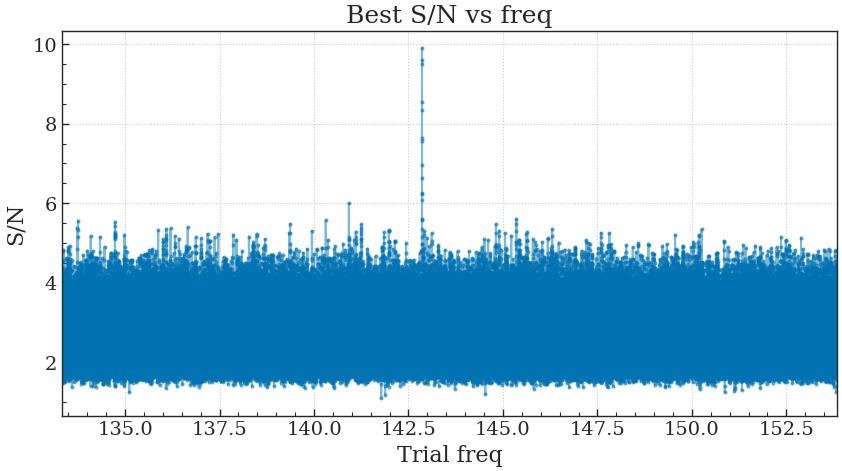

In [11]:
fig = pgram.plot_1d("freq", figsize=(10, 5))
plt.show()